# Data Analyst Associate Case Study Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.

In [3]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# shows the sample of dataset
claims = pd.read_csv('claims.csv')
claims.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


In [4]:
# check the data type in each variables
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


## Data Validation
Describe the validation tasks you performed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

#### 1. Claim ID
Claim ID must be unique as the identifier of the claim. We will use **duplicated** method from Pandas to check whether there are duplicated Claim ID or not. Built-in function **any** will return the value True if at least one duplicated value exists. From the code below, we know that every record has a unique Claim ID.

In [5]:
claims.duplicated(subset='Claim ID').any()

False

#### 2. Time to Close
Time to close shows the number of days it took for the claim to be closed. We know the data type of this variable is int64, so it must be numeric. We will not do anything to this variable.

#### 3. Claim Amount
The claim amount is an initial value in the currency of Brazil. In the dataset, we know that the variable is an object data type because of the 'R dollar' prefix. We must clear the 'R dollar' prefix and convert the value into numeric. Regex library will deleting the currency format. 

In [6]:
claims['Claim Amount'] = claims['Claim Amount'].apply(lambda x: int(re.sub(r'[^0-9]', '', x)))

claims.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,5000000,34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,18000000,56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,7000000,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,9510400,29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,2900000,12610.50,FORTALEZA,1,False,meat


#### 4. Amount Paid
This variable shows the total amount paid after the claim closed in the currency of Brazil. It seems that there is no problem with the value.

#### 5. Location
There are four locations on this variable RECIFE, SAO LUIS, FORTALEZA, and NATAL. I will ensure that there is no other value on this variable.

In [7]:
claims['Location'].value_counts()

SAO LUIS     30
RECIFE       25
FORTALEZA    22
NATAL        21
Name: Location, dtype: int64

#### 6. Individuals on Claim
This variable shows the number of individuals on this claims. From claims.info(), we know that this variable is numeric (int64). We will not do anything to this variable.

#### 7. Linked Case
This variable shows whether this claim is believed to be linked with other cases, either TRUE or FALSE. From claims.info(), we know that this variable is boolean. We will not do anything to this variable.

#### 8. Cause
This variable shows the cause of the food poisoning injuries, one of 'vegetable', 'meat', or 'unknown'. There are null values on this variable so we must convert it into 'unknown'.

In [8]:
claims['Cause'] = claims['Cause'].fillna('unknown')

#check the distribution of the value
claims['Cause'].value_counts()

unknown       78
meat          12
vegetables     8
Name: Cause, dtype: int64

In [9]:
#to ensure that there is no null value
claims.isnull().sum()

Claim ID                0
Time to Close           0
Claim Amount            0
Amount Paid             0
Location                0
Individuals on Claim    0
Linked Cases            0
Cause                   0
dtype: int64

## Data Discovery and Visualization
Describe what you found in the analysis and how the visualizations answer the customer questions in the project brief. In your description you should:
- Include at least two different data visualizations to demonstrate the characteristics of variables
- Include at least one data visualization to demonstrate the relationship between two or more variables
- Describe how your analysis has answered the business questions in the project brief

#### 1. How does the number of claims differ across locations?

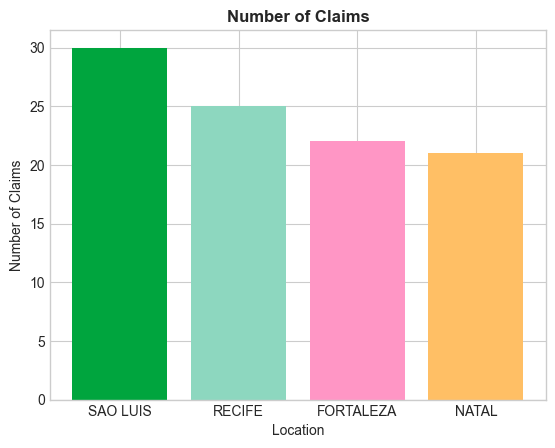

In [11]:
loc_dist = claims['Location'].value_counts()
plt.style.use('seaborn-whitegrid')
fig1, ax1 = plt.subplots()

#create a bar chart
ax1.bar(height=loc_dist.values, x=loc_dist.index, color=['#00A53E', '#8DD7BF', '#FF96C5', '#FFBF65'])
ax1.set_title("Number of Claims",fontweight='bold')
ax1.set_xlabel('Location')
ax1.set_ylabel('Number of Claims')
plt.show()

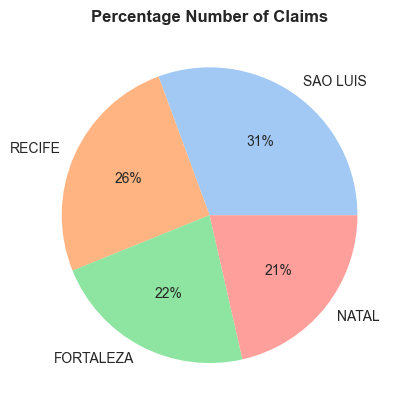

In [12]:
loc_dist = claims['Location'].value_counts() 
palette = sns.color_palette('pastel')[0:5]
plt.style.use('seaborn-whitegrid')

#create a pie chart
fig2, ax2 = plt.subplots()
ax2.pie(x=loc_dist.values, labels=loc_dist.index, autopct='%.0f%%', colors=palette)
ax2.set_title("Percentage Number of Claims",fontweight='bold')
plt.show()

We can use a bar chart to visualize the number of claims at each location. The x-axis shows the location and the y-axis shows the number of claims. Meanwhile, we can use a pie chart to see the composition of the claims. SAO LUIS has the highest number of claims (30 claims), followed by RECIFE (25 claims). The four locations have an insignificant number of claims. Next, we will look at the distribution of the number of individuals in a single claim across the four locations.

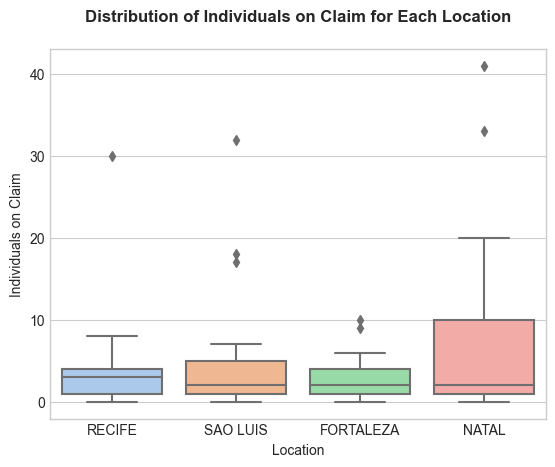

In [13]:
fig3, ax3 = plt.subplots()
plt.style.use('seaborn-whitegrid')
palette = sns.color_palette('pastel')[0:5]
sns.boxplot(data=claims, x='Location', y='Individuals on Claim', ax=ax3, palette=palette)
ax3.set_title("Distribution of Individuals on Claim for Each Location", fontweight='bold', pad=20)
plt.show()

Even though NATAL has the least number of claims, at that location one claim can be submitted by many people. We can get this from visualizing the distribution of the number of individuals in the claim for each location.

#### 2. What is the distribution of time to close claims?

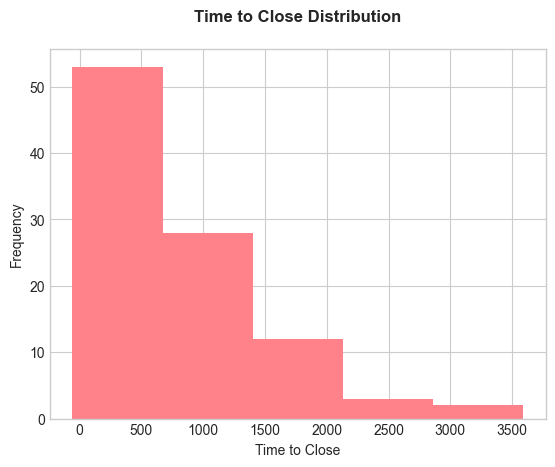

In [14]:
fig4, ax4 = plt.subplots()
plt.style.use('seaborn-whitegrid')

ax4.hist(x=claims['Time to Close'], bins=5, color='#FF828B')
ax4.set_title('Time to Close Distribution', pad=20, fontweight='bold')
ax4.set_xlabel('Time to Close')
ax4.set_ylabel("Frequency")
plt.show()

Histograms are used to describe the distribution of numeric variables. The time to close distribution is right-skewed, where the time to solve the claims is at most in the 0-500 day interval. This means that claims can be solved in a shorter period. Even though, from the visualization above there are claims that are solved in a long time.

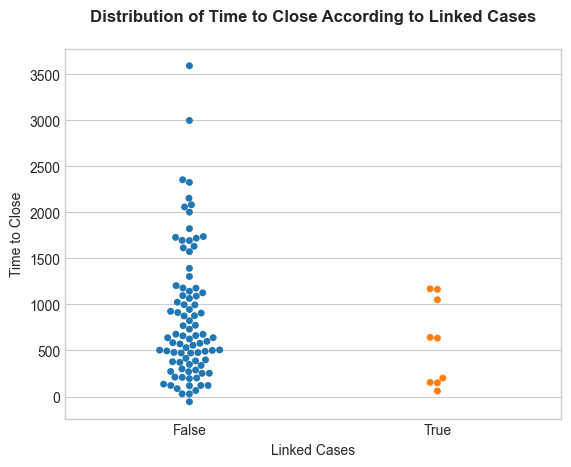

In [15]:
fig5, ax5 = plt.subplots()
plt.style.use('seaborn-whitegrid')

sns.swarmplot(data=claims, x='Linked Cases', y='Time to Close', ax=ax5)
ax5.set_title("Distribution of Time to Close According to Linked Cases", fontweight='bold', pad=20)
plt.show()

Similar to the boxplot, the swarm plot can be used to visualize the relationship between two variables in the form of categorical and numeric. However, from the swarm plot we can also see the number of data points. From this visualization, most of the claims are not related to other cases with a more varied distribution of time to close.

#### 3. How does the average time to close claims differ by location?

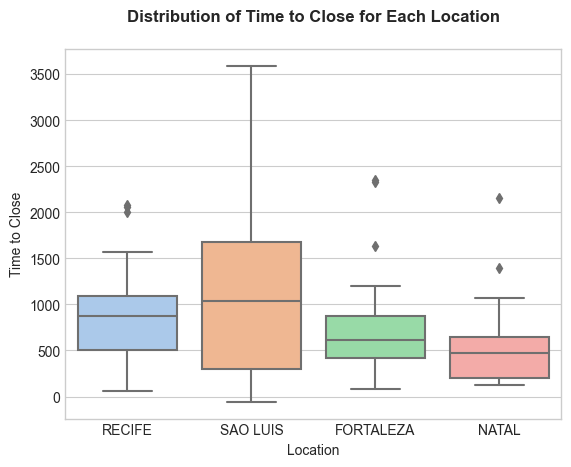

In [17]:
fig6, ax6 = plt.subplots()
plt.style.use('seaborn-whitegrid')
palette = sns.color_palette('pastel')[0:5]
sns.boxplot(data=claims, x='Location', y='Time to Close', ax=ax6, palette=palette)
ax6.set_title("Distribution of Time to Close for Each Location", fontweight='bold', pad=20)
plt.show()

We can find out the distribution of time to close at each location using a boxplot. SAO LUIS has a long and varied time to close distribution compared to the other three locations. This is also in line with previous information which states that the SAO LUIS area has many claims when compared to other locations. Therefore, it can be concluded that the higher variation in time to close in SAO LUIS is due to the large number of claims (30 claims) that must be solved.

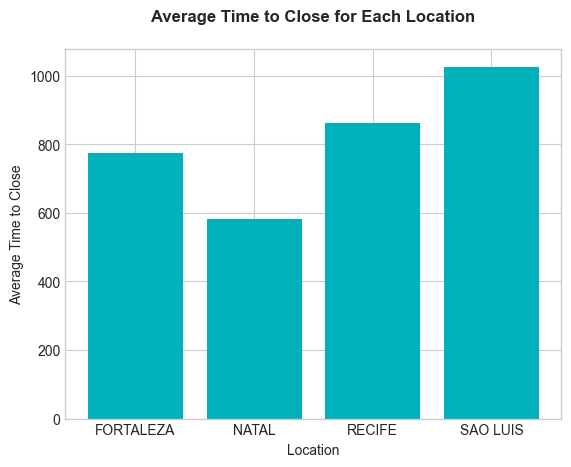

In [18]:
#average time to close
avg_ttc = claims[['Location','Time to Close']].groupby('Location').mean()
plt.style.use('seaborn-whitegrid')

fig7, ax7 = plt.subplots()
ax7.bar(x=avg_ttc.index, height=avg_ttc.values.reshape(1,-1)[0], color='#00B0BA')
ax7.set_title('Average Time to Close for Each Location', fontweight='bold', pad=20)
ax7.set_xlabel('Location')
ax7.set_ylabel('Average Time to Close')
plt.show()

Due to the high variation of time to close variable in the SAO LUIS region, automatically the average time required to solve the claim is also higher in SAO LUIS (1026 days).

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric, have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study